In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [3]:
df = pd.read_csv("../data/sierraleone-bumbuna.csv")
df

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,2021-10-30 00:04,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,2021-10-30 00:05,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525595,2022-10-29 23:56,-1.6,-0.1,-2.9,0.0,0.0,24.0,100.0,0.0,0.0,0.0,0.0,0.0,999,0,0.0,24.2,24.5,NaN
525596,2022-10-29 23:57,-1.7,-0.1,-3.0,0.0,0.0,24.0,100.0,0.0,0.0,0.0,0.0,0.0,999,0,0.0,24.2,24.5,NaN
525597,2022-10-29 23:58,-1.7,-0.1,-3.1,0.0,0.0,24.0,100.0,0.0,0.0,0.0,0.0,0.0,1000,0,0.0,24.1,24.4,NaN
525598,2022-10-29 23:59,-1.7,-0.2,-3.3,0.0,0.0,23.9,100.0,0.0,0.0,0.0,0.0,0.0,1000,0,0.0,24.1,24.4,NaN


In [4]:
df.describe()
df.isna().sum()
df.isna().mean() * 100  # % of missing values

Timestamp          0.0
GHI                0.0
DNI                0.0
DHI                0.0
ModA               0.0
ModB               0.0
Tamb               0.0
RH                 0.0
WS                 0.0
WSgust             0.0
WSstdev            0.0
WD                 0.0
WDstdev            0.0
BP                 0.0
Cleaning           0.0
Precipitation      0.0
TModA              0.0
TModB              0.0
Comments         100.0
dtype: float64

In [5]:
# Columns to check
cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

# Z-score for each column
z_scores = df[cols].apply(zscore)

# Flag extreme outliers
outliers = (np.abs(z_scores) > 3).any(axis=1)
df[outliers]  # View outlier rows

# Drop or Impute
df_clean = df.copy()
df_clean[cols] = df_clean[cols].fillna(df_clean[cols].median())

In [6]:
df_clean['Timestamp'] = pd.to_datetime(df_clean['Timestamp'])

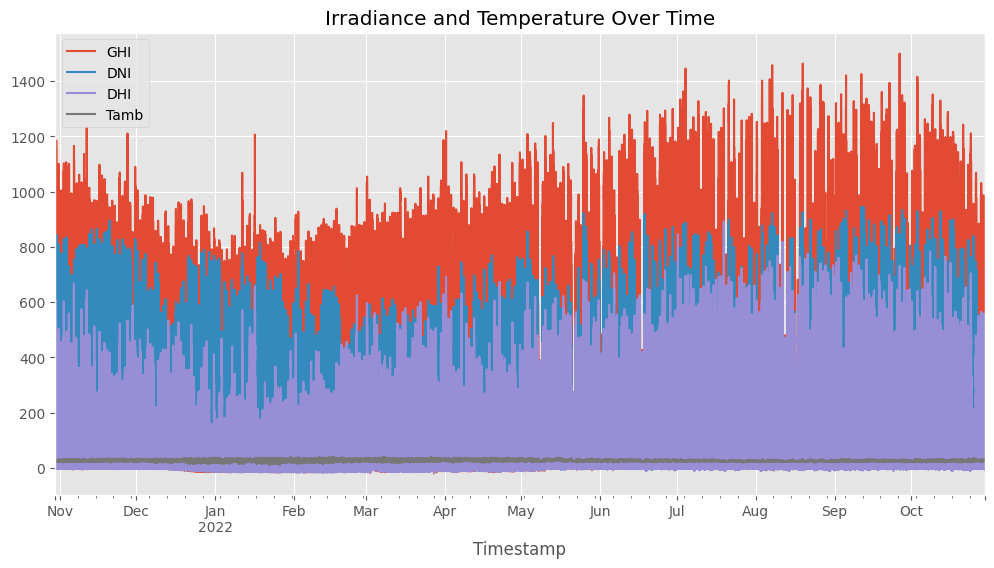

In [7]:
df_clean.plot(x='Timestamp', y=['GHI', 'DNI', 'DHI', 'Tamb'], figsize=(12, 6))
plt.title('Irradiance and Temperature Over Time')
plt.show()

In [8]:
df_clean['GHI'].loc[df_clean['GHI']<0] = 0
df_clean['DHI'].loc[df_clean['DHI']<0] = 0
df_clean['DNI'].loc[df_clean['DNI']<0] = 0
df_clean.to_csv('../data/sierraleone_clean.csv', index=False)

Text(0.5, 1.0, 'Effect of Cleaning on Module Performance')

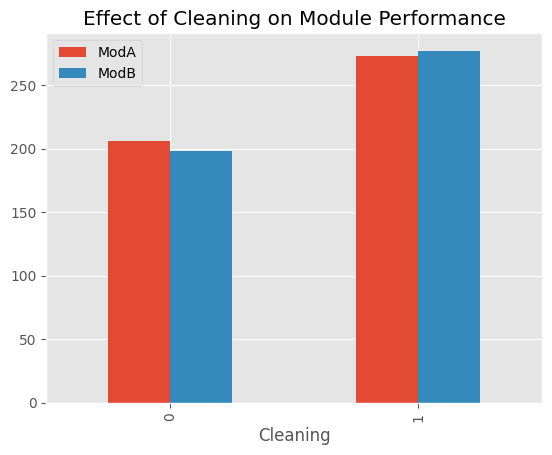

In [9]:
df.groupby('Cleaning')[['ModA', 'ModB']].mean().plot(kind='bar')
plt.title('Effect of Cleaning on Module Performance')

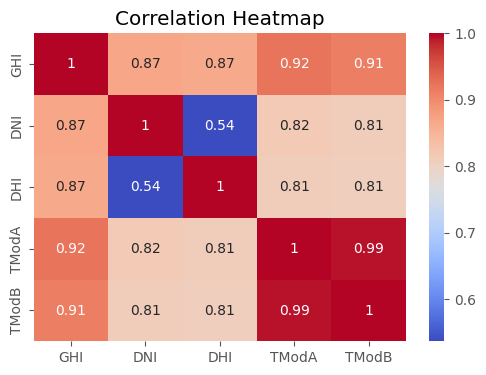

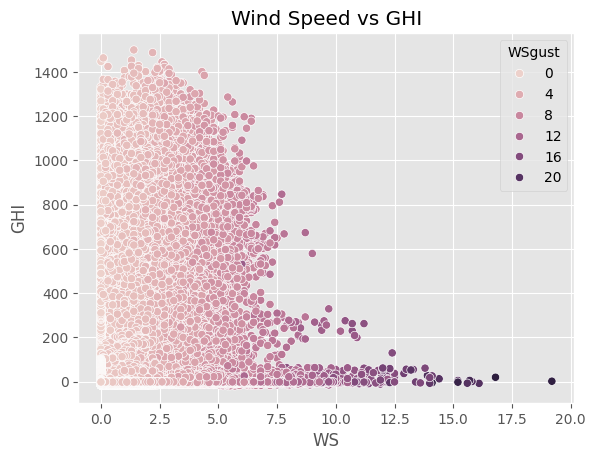

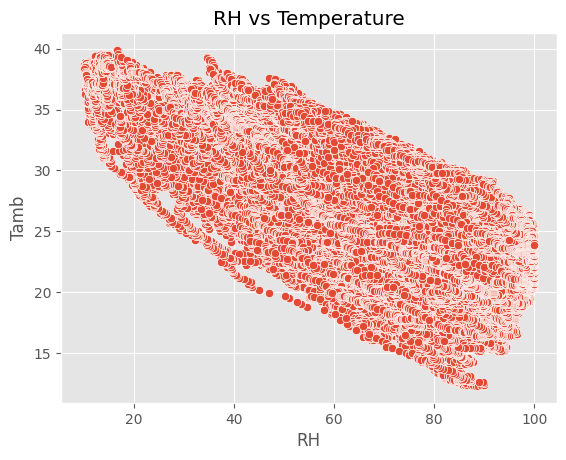

In [10]:
corr = df[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

sns.scatterplot(data=df, x='WS', y='GHI', hue='WSgust')
plt.title("Wind Speed vs GHI")
plt.show()

sns.scatterplot(data=df, x='RH', y='Tamb')
plt.title("RH vs Temperature")
plt.show()

Text(0.5, 1.0, 'Distribution of Wind Speed')

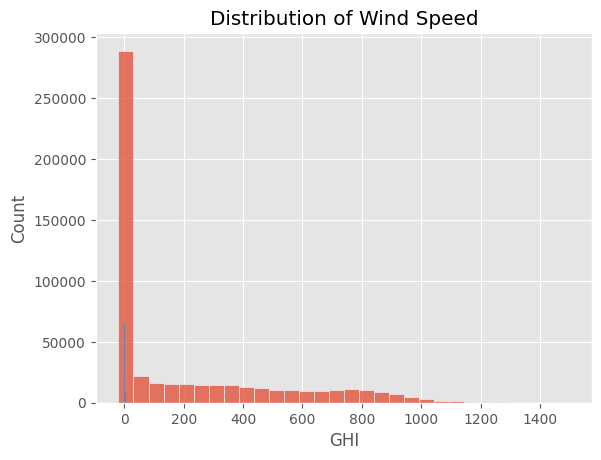

In [11]:
sns.histplot(df['GHI'], bins=30)
plt.title("Distribution of GHI")

sns.histplot(df['WS'], bins=30)
plt.title("Distribution of Wind Speed")

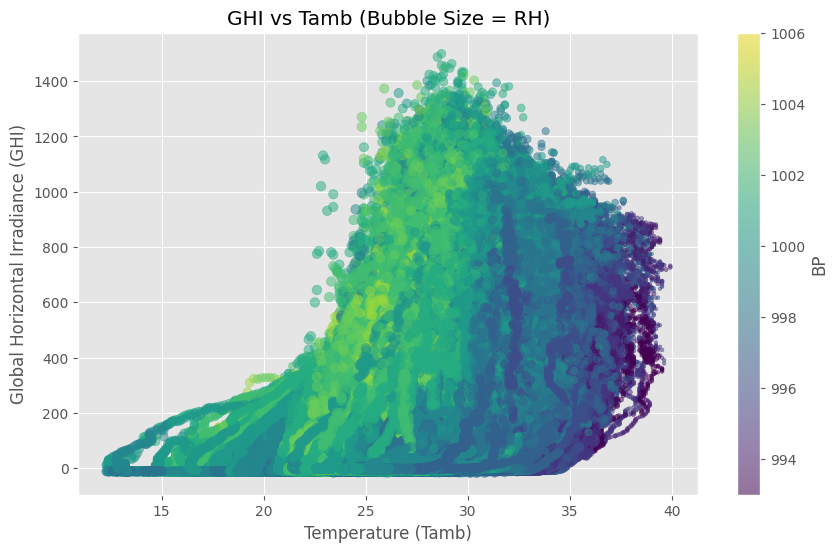

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Tamb'], df['GHI'], s=df['RH']*0.5,
            alpha=0.5, c=df['BP'], cmap='viridis')
plt.xlabel('Temperature (Tamb)')
plt.ylabel('Global Horizontal Irradiance (GHI)')
plt.title('GHI vs Tamb (Bubble Size = RH)')
plt.colorbar(label='BP')
plt.show()